# This is the baseline model of the project


### The first step is to import the necessary library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Read the train and test data

In [2]:
df_train = pd.read_csv('raw_data/sign_mnist_train.csv')
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [3]:
df_test = pd.read_csv('raw_data/sign_mnist_test.csv')
df_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [5]:
df_train.dtypes

label       int64
pixel1      int64
pixel2      int64
pixel3      int64
pixel4      int64
            ...  
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
pixel784    int64
Length: 785, dtype: object

In [6]:
df_train.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,...,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000
mean,12.318813,145.419377,148.500273,151.247714,153.546531,156.210891,158.411255,160.472154,162.339683,163.954799,...,141.104863,147.495611,153.325806,159.125332,161.969259,162.736696,162.906137,161.966454,161.137898,159.824731
std,7.287552,41.358555,39.942152,39.056286,38.595247,37.111165,36.125579,35.016392,33.661998,32.651607,...,63.751194,65.512894,64.427412,63.708507,63.738316,63.444008,63.509210,63.298721,63.610415,64.396846
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,121.000000,126.000000,130.000000,133.000000,137.000000,140.000000,142.000000,144.000000,146.000000,...,92.000000,96.000000,103.000000,112.000000,120.000000,125.000000,128.000000,128.000000,128.000000,125.500000
50%,13.000000,150.000000,153.000000,156.000000,158.000000,160.000000,162.000000,164.000000,165.000000,166.000000,...,144.000000,162.000000,172.000000,180.000000,183.000000,184.000000,184.000000,182.000000,182.000000,182.000000
75%,19.000000,174.000000,176.000000,178.000000,179.000000,181.000000,182.000000,183.000000,184.000000,185.000000,...,196.000000,202.000000,205.000000,207.000000,208.000000,207.000000,207.000000,206.000000,204.000000,204.000000
max,24.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


<Axes: xlabel='label', ylabel='Count'>

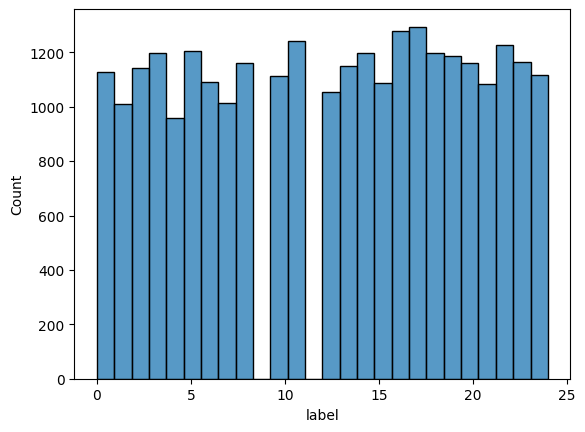

In [9]:
sns.histplot(df_train['label'],bins=26)

### Get the baselin Score:
- 1. Use the most frequent value in the training datasets as prediction
- 2. Use a random guess for the test datasets and then calculate the accuracy score

In [28]:
df_train['label'].value_counts().sort_values()

label
4      957
1     1010
7     1013
12    1055
21    1082
15    1088
6     1090
10    1114
24    1118
0     1126
2     1144
13    1151
20    1161
8     1162
23    1164
19    1186
14    1196
3     1196
18    1199
5     1204
22    1225
11    1241
16    1279
17    1294
Name: count, dtype: int64

In [30]:
from sklearn.metrics import accuracy_score

In [33]:
y_pred1 = 17 * np.ones(y_test.shape)
base_score1 = round(accuracy_score(y_test,y_pred1),2)
base_score1

0.02

In [39]:
y_pred2 = np.random.randint(0,25,y_test.shape)
base_score1 = round(accuracy_score(y_test,y_pred2),2)
base_score1

0.04

### The base line score for the total accuracy is 4% accurate by random guess.

In [10]:
X = df_train.drop(columns='label')/255
y = df_train['label'].copy()
print(X.shape,y.shape)

(27455, 784) (27455,)


In [11]:
X_test = df_test.drop(columns='label')/255
y_test = df_test['label'].copy()
print(X_test.shape,y_test.shape)

(7172, 784) (7172,)


In [12]:
img0 = np.reshape(df_train.drop(columns='label').iloc[0],(28,28))
img0.shape

(28, 28)

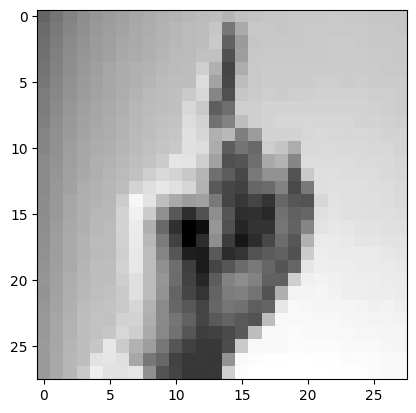

In [13]:
plt.imshow(img0,cmap='gray') 

In [17]:
from sklearn.model_selection import  cross_validate
from sklearn.metrics import accuracy_score
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten
from sklearn.ensemble import RandomForestClassifier

In [24]:
X_reshape = np.reshape(X,(X.shape[0],28,28))
X_test_reshape = np.reshape(X_test,(X_test.shape[0],28,28))

In [25]:
print(X_reshape.shape)
print(X_test_reshape.shape)

(27455, 28, 28)
(7172, 28, 28)


In [ ]:
def initial_model():
    model = Sequential()
    
    model.add(Conv2D())